# Data proejct. FRED data

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import datetime
import matplotlib.dates as mdates

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp


In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr

# Read and clean data

We'll be using the [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package, just like in the lecture. 

We want to investigate data for "Sticky Price Consumer Price Index less Food and Energy" and "Federal Funds Effective Rate"

In [4]:
import datetime
import pandas_datareader as pdr

# Define the start and end dates
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2023, 1, 1)

fred_inflation = pdr.get_data_fred(['CORESTICKM159SFRBATL'], start, end)
fred_inflation = fred_inflation.rename(columns={'CORESTICKM159SFRBATL': 'inflation'})
fred_inflation = fred_inflation.reset_index()
display(fred_inflation.head(5))
   
# Save inflation data to CSV to be able to keep for later use
fred_inflation.to_csv('fred_inflation.csv', index=False)

# Fetch federal funds rate data from FRED
fred_rate = pdr.get_data_fred(['FEDFUNDS'], start, end)
fred_rate = fred_rate.rename(columns={'FEDFUNDS': 'rate'})
fred_rate = fred_rate.reset_index()
display(fred_rate.head(5))
    
# Save federal funds rate data to CSV to be able to keep for later use
fred_rate.to_csv('fred_rate.csv', index=False)

,DATE,inflation
0,1990-01-01,4.905908
1,1990-02-01,4.917559
2,1990-03-01,5.191525
3,1990-04-01,5.276985
4,1990-05-01,5.166732


,DATE,rate
0,1990-01-01,8.23
1,1990-02-01,8.24
2,1990-03-01,8.28
3,1990-04-01,8.26
4,1990-05-01,8.18


In [5]:
fred_inflation.info()
fred_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       397 non-null    datetime64[ns]
 1   inflation  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   rate    397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


We see that the data is complete and that the data types are correct.

### Now merge the two data sets

In [6]:
# Read the CSV files
inflation_df = pd.read_csv('fred_inflation.csv')
rate_df = pd.read_csv('fred_rate.csv')

# Merge on the 'DATE' column
merged_df = pd.merge(inflation_df, rate_df, on='DATE')

# Save the merged dataset to a CSV file
merged_df.to_csv('merged_data.csv', index=False)
display(merged_df.head(5))

# Convert the 'DATE' column to datetime
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

,DATE,inflation,rate
0,1990-01-01,4.905908,8.23
1,1990-02-01,4.917559,8.24
2,1990-03-01,5.191525,8.28
3,1990-04-01,5.276985,8.26
4,1990-05-01,5.166732,8.18


# Descriptive statistics

In [7]:
# Descriptive statistics 
descriptive_stats = merged_df[['inflation', 'rate']].describe()
display(descriptive_stats)

,inflation,rate
count,397.000000,397.000000
mean,2.781251,2.709345
std,1.038467,2.365644
min,0.663868,0.050000
25%,2.169207,0.190000
50%,2.565678,2.160000
75%,3.184384,5.200000
max,6.538167,8.290000


We see that the mean of inflation and interest rate in about the same for the period but the volatility of the interest rate is greater

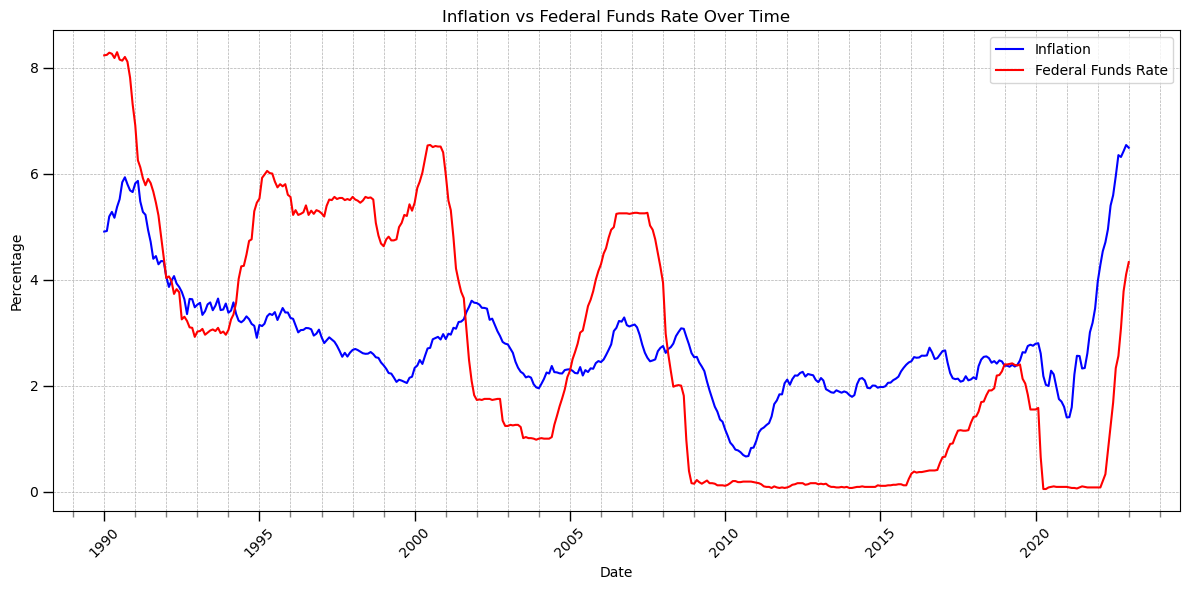

In [8]:
dp.plot_inflation_vs_rate_over_time(merged_df)

From this time plot it is not clear whether there is a clear link between inflation and interest rate, but it looks like that they may be correlated. This is seen especially around 1992, 2002, 2009 and 2020-2023. We see that the fluctuations of the interest rate is indeed greater than fluctuations in inflation rate 

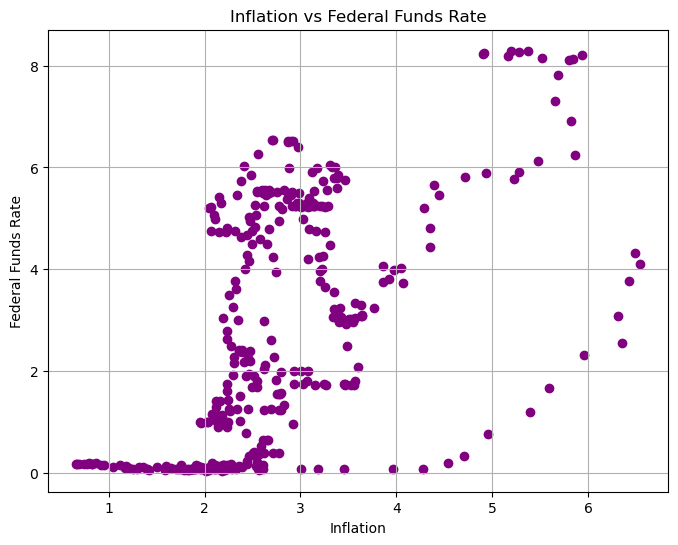

In [9]:
dp.plot_inflation_vs_rate_scatter(merged_df)

From the scatter plot we see that in time where inflation has been very low, the federal funds rate has been very low as well. This is in line with the theory that the central bank lowers the interest rate to stimulate the economy when inflation is low. On the other hand, when inflation is high, the federal funds rate is also high. This is in line with the theory that the central bank increases the interest rate to cool down the economy when inflation is high.

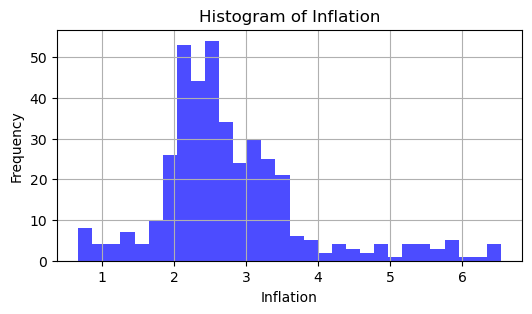

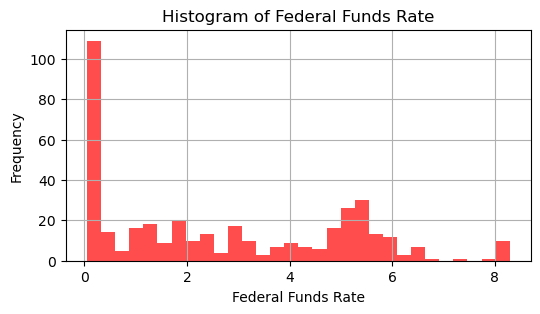

In [10]:
dp.histogram_inflation_rate(merged_df)
dp.histogram_rate(merged_df)

From the histograms we see that the inflation rate has typically been around 2-3 pct. while the interest rate in the period has been mostly close to 0 pct. 

# Adding money supply 

We now move on and add money supply to our analysis 

In [11]:
# Fetch money supply data from FRED
fred_money_supply = pdr.get_data_fred(['WM2NS'], start, end)
fred_money_supply = fred_money_supply.rename(columns={'WM2NS': 'money_supply'})
fred_money_supply = fred_money_supply.reset_index()


# Save money supply data to CSV to be able to keep for later use
fred_money_supply.to_csv('fred_money_supply.csv', index=False)

# Read the money supply CSV file
money_supply_df = pd.read_csv('fred_money_supply.csv')

# Convert the 'DATE' column to datetime in the money supply dataframe
money_supply_df['DATE'] = pd.to_datetime(money_supply_df['DATE'])

# Merge the money supply data with the existing merged dataset
merged_m2 = pd.merge(merged_df, money_supply_df, on='DATE')

# Save the final merged dataset to a CSV file
merged_m2.to_csv('final_merged_data.csv', index=False)
display(merged_m2.head(5))

# Calculate the yearly percentage change in money supply on the merged dataset
merged_m2['money_supply_pct_change'] = merged_m2['money_supply'].pct_change(12)

# Drop rows with NaN values in 'money_supply_pct_change' (first 12 months will have NaN)
merged_m2 = merged_m2.dropna(subset=['money_supply_pct_change'])

# Save the final merged dataset to a CSV file
merged_m2.to_csv('final_merged_data.csv', index=False)
display(merged_m2.head(5))


,DATE,inflation,rate,money_supply
0,1990-01-01,4.905908,8.23,3181.9
1,1990-10-01,5.798506,8.11,3242.6
2,1991-04-01,5.276160,5.91,3339.8
3,1991-07-01,4.713410,5.82,3346.1
4,1992-06-01,3.860189,3.76,3383.8


,DATE,inflation,rate,money_supply,money_supply_pct_change
12,1996-07-01,3.087422,5.40,3715.4,0.167667
13,1997-09-01,2.544804,5.54,3957.2,0.220379
14,1997-12-01,2.621536,5.50,4032.4,0.207378
15,1998-06-01,2.600204,5.56,4156.3,0.242133
16,1999-02-01,2.316234,4.76,4384.7,0.295792


#### Now split dataset to only consider 2010-2023 

In [12]:
# Split the dataset into two parts: 2010-2023 and the rest
dataset_2010_2023 = merged_m2[(merged_m2['DATE'] >= '2010-01-01') & (merged_m2['DATE'] <= '2023-01-01')]
dataset_rest = merged_m2[(merged_m2['DATE'] < '2010-01-01') | (merged_m2['DATE'] > '2023-01-01')]

# Save the split datasets to CSV files
dataset_2010_2023.to_csv('dataset_2010_2023.csv', index=False)
dataset_rest.to_csv('dataset_rest.csv', index=False)

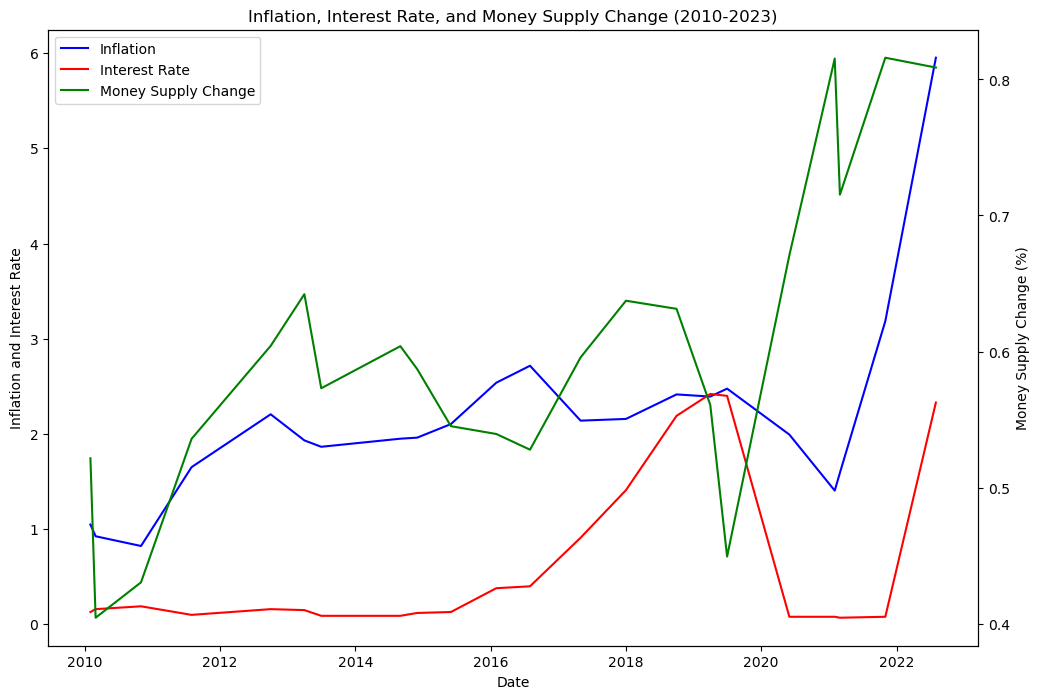

In [13]:
dp.plot_inflation_rate_money_supply(dataset_2010_2023)

From including money supply in our analysis it looks like there is a positive correlation between money supply and inflation, such that a higher money supply causes higher inflation. Looking at at 2020 (this is not economic analysis just looking at the graph) it looks like that when money supply increases inflation increase with some lag while the interest rate decrease. 